# **Learning Rate Experiment**

**Monique Antoinette R. Mendoza**

**DS4A**

## **Imports Libraries**

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

## **Device Configuration**

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cpu


## **Data Preparation (MNIST)**

In [3]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

train_dataset = datasets.MNIST(
    root="./data",
    train=True,
    download=True,
    transform=transform
)

test_dataset = datasets.MNIST(
    root="./data",
    train=False,
    download=True,
    transform=transform
)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

100%|██████████| 9.91M/9.91M [00:00<00:00, 22.8MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 776kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 5.77MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.71MB/s]


## **MLP Model Definition**

In [4]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

## **Training Function**

In [8]:
def train_model(learning_rate, epochs=15):
    model = MLP().to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    train_losses = []

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        avg_loss = running_loss / len(train_loader)
        train_losses.append(avg_loss)

        print(f"LR={learning_rate} | Epoch [{epoch+1}/{epochs}] | Loss: {avg_loss:.4f}")

    return model, train_losses

## **Evaluation Function**

In [9]:
def evaluate_model(model):
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    return accuracy

## **Run Experiments with Different Learning Rates**

In [10]:
learning_rates = [0.1, 0.001, 0.00001]
results = {}

for lr in learning_rates:
    print(f"Training with learning rate = {lr}")

    model, losses = train_model(lr)
    accuracy = evaluate_model(model)

    results[lr] = {
        "losses": losses,
        "accuracy": accuracy
    }

Training with learning rate = 0.1
LR=0.1 | Epoch [1/15] | Loss: 2.1290
LR=0.1 | Epoch [2/15] | Loss: 2.2029
LR=0.1 | Epoch [3/15] | Loss: 2.2733
LR=0.1 | Epoch [4/15] | Loss: 2.2592
LR=0.1 | Epoch [5/15] | Loss: 2.2109
LR=0.1 | Epoch [6/15] | Loss: 2.2589
LR=0.1 | Epoch [7/15] | Loss: 2.2746
LR=0.1 | Epoch [8/15] | Loss: 2.2595
LR=0.1 | Epoch [9/15] | Loss: 2.2139
LR=0.1 | Epoch [10/15] | Loss: 2.2330
LR=0.1 | Epoch [11/15] | Loss: 2.2233
LR=0.1 | Epoch [12/15] | Loss: 2.2346
LR=0.1 | Epoch [13/15] | Loss: 2.2123
LR=0.1 | Epoch [14/15] | Loss: 2.2119
LR=0.1 | Epoch [15/15] | Loss: 2.2090
Training with learning rate = 0.001
LR=0.001 | Epoch [1/15] | Loss: 0.2607
LR=0.001 | Epoch [2/15] | Loss: 0.1156
LR=0.001 | Epoch [3/15] | Loss: 0.0801
LR=0.001 | Epoch [4/15] | Loss: 0.0612
LR=0.001 | Epoch [5/15] | Loss: 0.0476
LR=0.001 | Epoch [6/15] | Loss: 0.0384
LR=0.001 | Epoch [7/15] | Loss: 0.0310
LR=0.001 | Epoch [8/15] | Loss: 0.0262
LR=0.001 | Epoch [9/15] | Loss: 0.0225
LR=0.001 | Epoch [

## **Plot Training Loss Curves**

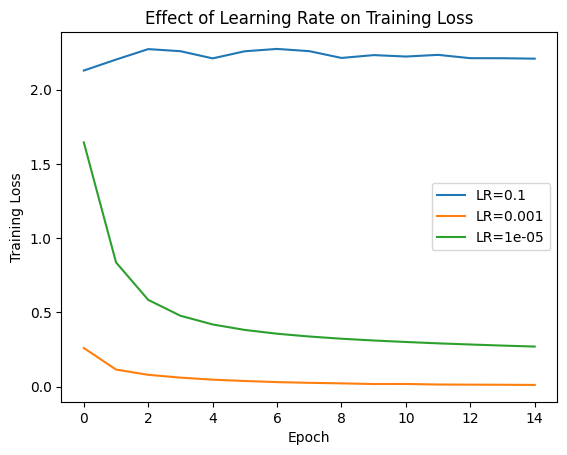

In [11]:
plt.figure()
for lr in learning_rates:
    plt.plot(results[lr]["losses"], label=f"LR={lr}")

plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.title("Effect of Learning Rate on Training Loss")
plt.legend()
plt.show()

## **Final Accuracy Results**

In [12]:
print("\nFinal Test Accuracy:")
for lr in learning_rates:
    print(f"Learning Rate {lr}: {results[lr]['accuracy']:.2f}%")


Final Test Accuracy:
Learning Rate 0.1: 13.87%
Learning Rate 0.001: 97.75%
Learning Rate 1e-05: 92.66%
